In [1]:
%load_ext autoreload
%autoreload 2

import os
import torch

os.chdir('..')
from models.architectures.encoders.fc import PTFCEncoder
from models.architectures.decoders.fc import PTFCDecoder
from models.pt_vae import PTVAE as VAE
from multiprocessing import cpu_count
from trainer import VAETrainer
import json
import numpy as np
from utils.nn_utils import  set_seed
print(os.getcwd())

/home/divankovic/master_thesis/nlp_disentanglement


In [2]:
# model parameters
SEED = 50
set_seed(SEED)
INPUT_DIM = 2000
HIDDEN_DIM = 500
LATENT_DIM = 50

# training parameters
BATCH_SIZE = 500
NUM_EPOCHS = 1000
LEARNING_RATE = 5e-5
CUDA = torch.cuda.is_available()
# beta template for hfvae (gammma, 1, alpha, beta, 0)
parameters = {'SEED':SEED, 'INPUT_DIM':INPUT_DIM, 'HIDDEN_DIM':HIDDEN_DIM, 'LATENT_DIM':LATENT_DIM, 'BATCH_SIZE':BATCH_SIZE,
              'NUM_EPOCHS':NUM_EPOCHS, 'LEARNING_RATE':LEARNING_RATE}
DATA_PATH = 'resources/datasets/20news/'
SAVE_PATH = 'results/nvdm/probtorch/+'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

### Data loading

In [3]:
# data loading
kwargs = {'num_workers': cpu_count(), 'pin_memory': True} if CUDA else {'num_workers': cpu_count()}
labels = json.load(open(DATA_PATH+'topics.json', 'r'))
train_data = np.load(DATA_PATH+'train.npy')
train_labels = np.load(DATA_PATH+'train.labels.npy')
test_data = np.load(DATA_PATH+'test.npy')
test_labels = np.load(DATA_PATH+'test.labels.npy')


train_loader = torch.utils.data.DataLoader([[x,y] for x,y in zip(train_data, train_labels)],
                                         batch_size=BATCH_SIZE, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader([[x,y] for x,y in zip(test_data, test_labels)],
                                        batch_size=BATCH_SIZE, shuffle=True, **kwargs)


### Model training

In [ ]:
# model training
from utils.file_handling import MultiOutput
import sys
f = open(SAVE_PATH+'train_output.txt','w')
original = sys.stdout
# write to output and save output to file
sys.stdout = MultiOutput(sys.stdout, f)

enc = PTFCEncoder(input_dim=INPUT_DIM, hidden_dim=HIDDEN_DIM, latent_dim=LATENT_DIM, architecture='NVDM+')
dec = PTFCDecoder(latent_dim=LATENT_DIM, output_dim=INPUT_DIM, batch_size=BATCH_SIZE)
model = VAE(encoder=enc, decoder=dec)
model.cuda().double()
optimizer =  torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
device = torch.device("cuda" if CUDA else "cpu")

VAETrainer(model, device, train_loader, test_loader, save_model_path=SAVE_PATH, probtorch=True, included_labels=True)\
    .run(optimizer, NUM_EPOCHS, track_mutual_info=False)
# save parameters
json.dump(parameters, open(SAVE_PATH+'parameters.json', 'w'))
# return output to normal
sys.stdout = original
f.close()


Train Epoch:  1 [     0/ 11314 (  0%)]	Loss: 267.179815
Train Epoch:  1 [  5000/ 11314 ( 43%)]	Loss: 255.905254
Train Epoch:  1 [ 10000/ 11314 ( 87%)]	Loss: 403.715196
====> Epoch: 1 Average loss: 337.9890
====> Test set loss: 314.5010
Train Epoch:  2 [     0/ 11314 (  0%)]	Loss: 311.023422
Train Epoch:  2 [  5000/ 11314 ( 43%)]	Loss: 303.999910
Train Epoch:  2 [ 10000/ 11314 ( 87%)]	Loss: 326.295019
====> Epoch: 2 Average loss: 335.1043
====> Test set loss: 313.7340
Train Epoch:  3 [     0/ 11314 (  0%)]	Loss: 407.090590
Train Epoch:  3 [  5000/ 11314 ( 43%)]	Loss: 443.218846
Train Epoch:  3 [ 10000/ 11314 ( 87%)]	Loss: 302.626912
====> Epoch: 3 Average loss: 334.0835
====> Test set loss: 313.5630
Train Epoch:  4 [     0/ 11314 (  0%)]	Loss: 393.112228
Train Epoch:  4 [  5000/ 11314 ( 43%)]	Loss: 404.344079
Train Epoch:  4 [ 10000/ 11314 ( 87%)]	Loss: 261.857581
====> Epoch: 4 Average loss: 333.8478
====> Test set loss: 313.0371
Train Epoch:  5 [     0/ 11314 (  0%)]	Loss: 287.234664


Train Epoch: 35 [ 10000/ 11314 ( 87%)]	Loss: 331.874732
====> Epoch: 35 Average loss: 321.5885
====> Test set loss: 310.2382
Train Epoch: 36 [     0/ 11314 (  0%)]	Loss: 283.429433
Train Epoch: 36 [  5000/ 11314 ( 43%)]	Loss: 289.413463
Train Epoch: 36 [ 10000/ 11314 ( 87%)]	Loss: 292.095471
====> Epoch: 36 Average loss: 321.5298
====> Test set loss: 310.0104
Train Epoch: 37 [     0/ 11314 (  0%)]	Loss: 324.664184
Train Epoch: 37 [  5000/ 11314 ( 43%)]	Loss: 355.177604
Train Epoch: 37 [ 10000/ 11314 ( 87%)]	Loss: 291.966677
====> Epoch: 37 Average loss: 317.6868
====> Test set loss: 308.8430
Train Epoch: 38 [     0/ 11314 (  0%)]	Loss: 318.042986
Train Epoch: 38 [  5000/ 11314 ( 43%)]	Loss: 306.101270
Train Epoch: 38 [ 10000/ 11314 ( 87%)]	Loss: 281.435861
====> Epoch: 38 Average loss: 320.2996
====> Test set loss: 307.4580
Train Epoch: 39 [     0/ 11314 (  0%)]	Loss: 318.806256
Train Epoch: 39 [  5000/ 11314 ( 43%)]	Loss: 283.497541
Train Epoch: 39 [ 10000/ 11314 ( 87%)]	Loss: 294.266

Train Epoch: 70 [     0/ 11314 (  0%)]	Loss: 250.653580
Train Epoch: 70 [  5000/ 11314 ( 43%)]	Loss: 345.755524
Train Epoch: 70 [ 10000/ 11314 ( 87%)]	Loss: 289.517873
====> Epoch: 70 Average loss: 313.2577
====> Test set loss: 310.1921
Train Epoch: 71 [     0/ 11314 (  0%)]	Loss: 326.840002
Train Epoch: 71 [  5000/ 11314 ( 43%)]	Loss: 318.199622
Train Epoch: 71 [ 10000/ 11314 ( 87%)]	Loss: 335.312960
====> Epoch: 71 Average loss: 312.4754
====> Test set loss: 310.4037
Train Epoch: 72 [     0/ 11314 (  0%)]	Loss: 259.890120
Train Epoch: 72 [  5000/ 11314 ( 43%)]	Loss: 307.860032
Train Epoch: 72 [ 10000/ 11314 ( 87%)]	Loss: 376.421905
====> Epoch: 72 Average loss: 310.2363
====> Test set loss: 309.5180
Train Epoch: 73 [     0/ 11314 (  0%)]	Loss: 286.191278
Train Epoch: 73 [  5000/ 11314 ( 43%)]	Loss: 318.166031
Train Epoch: 73 [ 10000/ 11314 ( 87%)]	Loss: 268.779300
====> Epoch: 73 Average loss: 311.2282
====> Test set loss: 309.5490
Train Epoch: 74 [     0/ 11314 (  0%)]	Loss: 352.559

Train Epoch: 104 [ 10000/ 11314 ( 87%)]	Loss: 394.423692
====> Epoch: 104 Average loss: 306.0676
====> Test set loss: 308.5724
Train Epoch: 105 [     0/ 11314 (  0%)]	Loss: 314.875795
Train Epoch: 105 [  5000/ 11314 ( 43%)]	Loss: 320.553741
Train Epoch: 105 [ 10000/ 11314 ( 87%)]	Loss: 283.301421
====> Epoch: 105 Average loss: 306.1425
====> Test set loss: 308.7711
Train Epoch: 106 [     0/ 11314 (  0%)]	Loss: 319.209776
Train Epoch: 106 [  5000/ 11314 ( 43%)]	Loss: 278.254862
Train Epoch: 106 [ 10000/ 11314 ( 87%)]	Loss: 274.773390
====> Epoch: 106 Average loss: 304.8376
====> Test set loss: 308.5493
Train Epoch: 107 [     0/ 11314 (  0%)]	Loss: 341.120816
Train Epoch: 107 [  5000/ 11314 ( 43%)]	Loss: 267.397732
Train Epoch: 107 [ 10000/ 11314 ( 87%)]	Loss: 328.040732
====> Epoch: 107 Average loss: 307.6151
====> Test set loss: 309.0813
Train Epoch: 108 [     0/ 11314 (  0%)]	Loss: 293.677660
Train Epoch: 108 [  5000/ 11314 ( 43%)]	Loss: 321.089613
Train Epoch: 108 [ 10000/ 11314 ( 87

Train Epoch: 138 [  5000/ 11314 ( 43%)]	Loss: 296.896800
Train Epoch: 138 [ 10000/ 11314 ( 87%)]	Loss: 322.013202
====> Epoch: 138 Average loss: 302.6246
====> Test set loss: 307.2331
Train Epoch: 139 [     0/ 11314 (  0%)]	Loss: 270.611797
Train Epoch: 139 [  5000/ 11314 ( 43%)]	Loss: 334.427568
Train Epoch: 139 [ 10000/ 11314 ( 87%)]	Loss: 305.589515
====> Epoch: 139 Average loss: 304.0748
====> Test set loss: 306.3865
Train Epoch: 140 [     0/ 11314 (  0%)]	Loss: 299.075952
Train Epoch: 140 [  5000/ 11314 ( 43%)]	Loss: 314.319731
Train Epoch: 140 [ 10000/ 11314 ( 87%)]	Loss: 306.778527
====> Epoch: 140 Average loss: 303.2548
====> Test set loss: 307.4929
Train Epoch: 141 [     0/ 11314 (  0%)]	Loss: 224.060446
Train Epoch: 141 [  5000/ 11314 ( 43%)]	Loss: 328.739768
Train Epoch: 141 [ 10000/ 11314 ( 87%)]	Loss: 321.784893
====> Epoch: 141 Average loss: 301.1444
====> Test set loss: 307.4735
Train Epoch: 142 [     0/ 11314 (  0%)]	Loss: 255.889305
Train Epoch: 142 [  5000/ 11314 ( 43

Train Epoch: 172 [     0/ 11314 (  0%)]	Loss: 315.266058
Train Epoch: 172 [  5000/ 11314 ( 43%)]	Loss: 286.295357
Train Epoch: 172 [ 10000/ 11314 ( 87%)]	Loss: 262.647145
====> Epoch: 172 Average loss: 299.3541
====> Test set loss: 305.7327
Train Epoch: 173 [     0/ 11314 (  0%)]	Loss: 270.955679
Train Epoch: 173 [  5000/ 11314 ( 43%)]	Loss: 336.862957
Train Epoch: 173 [ 10000/ 11314 ( 87%)]	Loss: 282.712849
====> Epoch: 173 Average loss: 297.8466
====> Test set loss: 305.5264
Train Epoch: 174 [     0/ 11314 (  0%)]	Loss: 271.419363
Train Epoch: 174 [  5000/ 11314 ( 43%)]	Loss: 283.607880
Train Epoch: 174 [ 10000/ 11314 ( 87%)]	Loss: 242.411623
====> Epoch: 174 Average loss: 298.5334
====> Test set loss: 304.6727
Train Epoch: 175 [     0/ 11314 (  0%)]	Loss: 336.627375
Train Epoch: 175 [  5000/ 11314 ( 43%)]	Loss: 349.629544
Train Epoch: 175 [ 10000/ 11314 ( 87%)]	Loss: 292.196088
====> Epoch: 175 Average loss: 297.5040
====> Test set loss: 305.4288
Train Epoch: 176 [     0/ 11314 (  0

====> Test set loss: 301.0077
Train Epoch: 206 [     0/ 11314 (  0%)]	Loss: 255.561261
Train Epoch: 206 [  5000/ 11314 ( 43%)]	Loss: 287.882583
Train Epoch: 206 [ 10000/ 11314 ( 87%)]	Loss: 275.748756
====> Epoch: 206 Average loss: 294.7299
====> Test set loss: 302.5917
Train Epoch: 207 [     0/ 11314 (  0%)]	Loss: 324.655731
Train Epoch: 207 [  5000/ 11314 ( 43%)]	Loss: 284.634269
Train Epoch: 207 [ 10000/ 11314 ( 87%)]	Loss: 313.853707
====> Epoch: 207 Average loss: 295.4623
====> Test set loss: 302.2639
Train Epoch: 208 [     0/ 11314 (  0%)]	Loss: 279.308604
Train Epoch: 208 [  5000/ 11314 ( 43%)]	Loss: 256.547829
Train Epoch: 208 [ 10000/ 11314 ( 87%)]	Loss: 261.927256
====> Epoch: 208 Average loss: 294.6716
====> Test set loss: 301.9641
Train Epoch: 209 [     0/ 11314 (  0%)]	Loss: 359.556608
Train Epoch: 209 [  5000/ 11314 ( 43%)]	Loss: 350.444242
Train Epoch: 209 [ 10000/ 11314 ( 87%)]	Loss: 327.814190
====> Epoch: 209 Average loss: 294.3463
====> Test set loss: 301.9228
Train 

====> Epoch: 239 Average loss: 292.8917
====> Test set loss: 298.8455
Train Epoch: 240 [     0/ 11314 (  0%)]	Loss: 315.052290
Train Epoch: 240 [  5000/ 11314 ( 43%)]	Loss: 288.759125
Train Epoch: 240 [ 10000/ 11314 ( 87%)]	Loss: 291.110217
====> Epoch: 240 Average loss: 293.4990
====> Test set loss: 297.4560
Train Epoch: 241 [     0/ 11314 (  0%)]	Loss: 269.268963
Train Epoch: 241 [  5000/ 11314 ( 43%)]	Loss: 315.740585
Train Epoch: 241 [ 10000/ 11314 ( 87%)]	Loss: 320.266315
====> Epoch: 241 Average loss: 295.0044
====> Test set loss: 299.2252
Train Epoch: 242 [     0/ 11314 (  0%)]	Loss: 285.285222
Train Epoch: 242 [  5000/ 11314 ( 43%)]	Loss: 276.258267
Train Epoch: 242 [ 10000/ 11314 ( 87%)]	Loss: 278.796077
====> Epoch: 242 Average loss: 293.0873
====> Test set loss: 298.8965
Train Epoch: 243 [     0/ 11314 (  0%)]	Loss: 242.927626
Train Epoch: 243 [  5000/ 11314 ( 43%)]	Loss: 281.363027
Train Epoch: 243 [ 10000/ 11314 ( 87%)]	Loss: 346.241715
====> Epoch: 243 Average loss: 292.3

Train Epoch: 273 [ 10000/ 11314 ( 87%)]	Loss: 263.472855
====> Epoch: 273 Average loss: 290.6755
====> Test set loss: 297.3570
Train Epoch: 274 [     0/ 11314 (  0%)]	Loss: 242.591949
Train Epoch: 274 [  5000/ 11314 ( 43%)]	Loss: 305.506834
Train Epoch: 274 [ 10000/ 11314 ( 87%)]	Loss: 320.588350
====> Epoch: 274 Average loss: 288.6867
====> Test set loss: 297.5840
Train Epoch: 275 [     0/ 11314 (  0%)]	Loss: 253.326045
Train Epoch: 275 [  5000/ 11314 ( 43%)]	Loss: 297.143208
Train Epoch: 275 [ 10000/ 11314 ( 87%)]	Loss: 310.124362
====> Epoch: 275 Average loss: 290.6986
====> Test set loss: 297.1491
Train Epoch: 276 [     0/ 11314 (  0%)]	Loss: 343.679652
Train Epoch: 276 [  5000/ 11314 ( 43%)]	Loss: 270.428181
Train Epoch: 276 [ 10000/ 11314 ( 87%)]	Loss: 268.801565
====> Epoch: 276 Average loss: 292.9920
====> Test set loss: 297.1926
Train Epoch: 277 [     0/ 11314 (  0%)]	Loss: 274.563768
Train Epoch: 277 [  5000/ 11314 ( 43%)]	Loss: 242.944755
Train Epoch: 277 [ 10000/ 11314 ( 87

Train Epoch: 307 [  5000/ 11314 ( 43%)]	Loss: 266.285566
Train Epoch: 307 [ 10000/ 11314 ( 87%)]	Loss: 268.516299
====> Epoch: 307 Average loss: 288.8918
====> Test set loss: 294.6818
Train Epoch: 308 [     0/ 11314 (  0%)]	Loss: 252.352207
Train Epoch: 308 [  5000/ 11314 ( 43%)]	Loss: 269.880409
Train Epoch: 308 [ 10000/ 11314 ( 87%)]	Loss: 255.039591
====> Epoch: 308 Average loss: 291.2252
====> Test set loss: 294.5141
Train Epoch: 309 [     0/ 11314 (  0%)]	Loss: 256.731862
Train Epoch: 309 [  5000/ 11314 ( 43%)]	Loss: 301.725592
Train Epoch: 309 [ 10000/ 11314 ( 87%)]	Loss: 238.469053
====> Epoch: 309 Average loss: 291.7457
====> Test set loss: 294.4920
Train Epoch: 310 [     0/ 11314 (  0%)]	Loss: 331.281713
Train Epoch: 310 [  5000/ 11314 ( 43%)]	Loss: 272.730922
Train Epoch: 310 [ 10000/ 11314 ( 87%)]	Loss: 302.983708
====> Epoch: 310 Average loss: 289.5462
====> Test set loss: 292.0803
Train Epoch: 311 [     0/ 11314 (  0%)]	Loss: 281.218689
Train Epoch: 311 [  5000/ 11314 ( 43

Train Epoch: 341 [     0/ 11314 (  0%)]	Loss: 273.992210
Train Epoch: 341 [  5000/ 11314 ( 43%)]	Loss: 335.020952
Train Epoch: 341 [ 10000/ 11314 ( 87%)]	Loss: 290.171278
====> Epoch: 341 Average loss: 288.8700
====> Test set loss: 293.0895
Train Epoch: 342 [     0/ 11314 (  0%)]	Loss: 262.655487
Train Epoch: 342 [  5000/ 11314 ( 43%)]	Loss: 266.940853
Train Epoch: 342 [ 10000/ 11314 ( 87%)]	Loss: 246.093821
====> Epoch: 342 Average loss: 287.3800
====> Test set loss: 292.5379
Train Epoch: 343 [     0/ 11314 (  0%)]	Loss: 282.290995
Train Epoch: 343 [  5000/ 11314 ( 43%)]	Loss: 301.740378
Train Epoch: 343 [ 10000/ 11314 ( 87%)]	Loss: 282.955460
====> Epoch: 343 Average loss: 288.3766
====> Test set loss: 292.4304
Train Epoch: 344 [     0/ 11314 (  0%)]	Loss: 260.224965
Train Epoch: 344 [  5000/ 11314 ( 43%)]	Loss: 222.526948
Train Epoch: 344 [ 10000/ 11314 ( 87%)]	Loss: 339.194246
====> Epoch: 344 Average loss: 288.6325
====> Test set loss: 292.5576
Train Epoch: 345 [     0/ 11314 (  0

====> Test set loss: 289.8212
Train Epoch: 375 [     0/ 11314 (  0%)]	Loss: 312.480884
Train Epoch: 375 [  5000/ 11314 ( 43%)]	Loss: 381.629074
Train Epoch: 375 [ 10000/ 11314 ( 87%)]	Loss: 249.398020
====> Epoch: 375 Average loss: 287.1949
====> Test set loss: 291.0509
Train Epoch: 376 [     0/ 11314 (  0%)]	Loss: 349.562447
Train Epoch: 376 [  5000/ 11314 ( 43%)]	Loss: 279.273874
Train Epoch: 376 [ 10000/ 11314 ( 87%)]	Loss: 327.043074
====> Epoch: 376 Average loss: 285.0613
====> Test set loss: 289.8200
Train Epoch: 377 [     0/ 11314 (  0%)]	Loss: 306.584891
Train Epoch: 377 [  5000/ 11314 ( 43%)]	Loss: 261.398390
Train Epoch: 377 [ 10000/ 11314 ( 87%)]	Loss: 248.499589
====> Epoch: 377 Average loss: 285.7623
====> Test set loss: 290.9397
Train Epoch: 378 [     0/ 11314 (  0%)]	Loss: 252.769113
Train Epoch: 378 [  5000/ 11314 ( 43%)]	Loss: 296.572918
Train Epoch: 378 [ 10000/ 11314 ( 87%)]	Loss: 275.768781
====> Epoch: 378 Average loss: 287.7943
====> Test set loss: 291.5187
Train 

====> Epoch: 408 Average loss: 287.8611
====> Test set loss: 290.1086
Train Epoch: 409 [     0/ 11314 (  0%)]	Loss: 280.551172
Train Epoch: 409 [  5000/ 11314 ( 43%)]	Loss: 273.414220
Train Epoch: 409 [ 10000/ 11314 ( 87%)]	Loss: 287.514178
====> Epoch: 409 Average loss: 285.2178
====> Test set loss: 290.2205
Train Epoch: 410 [     0/ 11314 (  0%)]	Loss: 304.901554
Train Epoch: 410 [  5000/ 11314 ( 43%)]	Loss: 276.259240
Train Epoch: 410 [ 10000/ 11314 ( 87%)]	Loss: 318.758365
====> Epoch: 410 Average loss: 284.8245
====> Test set loss: 289.9837
Train Epoch: 411 [     0/ 11314 (  0%)]	Loss: 247.358481
Train Epoch: 411 [  5000/ 11314 ( 43%)]	Loss: 326.945643
Train Epoch: 411 [ 10000/ 11314 ( 87%)]	Loss: 253.893135
====> Epoch: 411 Average loss: 287.2340
====> Test set loss: 290.3540
Train Epoch: 412 [     0/ 11314 (  0%)]	Loss: 256.481936
Train Epoch: 412 [  5000/ 11314 ( 43%)]	Loss: 256.448433
Train Epoch: 412 [ 10000/ 11314 ( 87%)]	Loss: 248.443852
====> Epoch: 412 Average loss: 285.0

Train Epoch: 442 [ 10000/ 11314 ( 87%)]	Loss: 259.971546
====> Epoch: 442 Average loss: 285.2611
====> Test set loss: 288.5986
Train Epoch: 443 [     0/ 11314 (  0%)]	Loss: 251.549055
Train Epoch: 443 [  5000/ 11314 ( 43%)]	Loss: 288.018587
Train Epoch: 443 [ 10000/ 11314 ( 87%)]	Loss: 376.419020
====> Epoch: 443 Average loss: 283.9571
====> Test set loss: 287.6263
Train Epoch: 444 [     0/ 11314 (  0%)]	Loss: 283.712702
Train Epoch: 444 [  5000/ 11314 ( 43%)]	Loss: 300.362935
Train Epoch: 444 [ 10000/ 11314 ( 87%)]	Loss: 347.337525
====> Epoch: 444 Average loss: 285.5009
====> Test set loss: 288.1800
Train Epoch: 445 [     0/ 11314 (  0%)]	Loss: 214.406078
Train Epoch: 445 [  5000/ 11314 ( 43%)]	Loss: 315.555266
Train Epoch: 445 [ 10000/ 11314 ( 87%)]	Loss: 215.584460
====> Epoch: 445 Average loss: 285.4580
====> Test set loss: 288.9119
Train Epoch: 446 [     0/ 11314 (  0%)]	Loss: 369.769482
Train Epoch: 446 [  5000/ 11314 ( 43%)]	Loss: 259.936138
Train Epoch: 446 [ 10000/ 11314 ( 87

Train Epoch: 476 [  5000/ 11314 ( 43%)]	Loss: 245.795144
Train Epoch: 476 [ 10000/ 11314 ( 87%)]	Loss: 298.560720
====> Epoch: 476 Average loss: 284.1899
====> Test set loss: 287.5240
Train Epoch: 477 [     0/ 11314 (  0%)]	Loss: 231.257059
Train Epoch: 477 [  5000/ 11314 ( 43%)]	Loss: 361.801865
Train Epoch: 477 [ 10000/ 11314 ( 87%)]	Loss: 276.070928
====> Epoch: 477 Average loss: 284.6300
====> Test set loss: 288.0701
Train Epoch: 478 [     0/ 11314 (  0%)]	Loss: 255.332676
Train Epoch: 478 [  5000/ 11314 ( 43%)]	Loss: 312.759797
Train Epoch: 478 [ 10000/ 11314 ( 87%)]	Loss: 318.572930
====> Epoch: 478 Average loss: 282.4640
====> Test set loss: 287.6465
Train Epoch: 479 [     0/ 11314 (  0%)]	Loss: 296.472187
Train Epoch: 479 [  5000/ 11314 ( 43%)]	Loss: 330.224987
Train Epoch: 479 [ 10000/ 11314 ( 87%)]	Loss: 250.506587
====> Epoch: 479 Average loss: 285.5716
====> Test set loss: 287.5395
Train Epoch: 480 [     0/ 11314 (  0%)]	Loss: 268.011464
Train Epoch: 480 [  5000/ 11314 ( 43

Train Epoch: 510 [     0/ 11314 (  0%)]	Loss: 263.030171
Train Epoch: 510 [  5000/ 11314 ( 43%)]	Loss: 282.686276
Train Epoch: 510 [ 10000/ 11314 ( 87%)]	Loss: 291.688862
====> Epoch: 510 Average loss: 284.2878
====> Test set loss: 286.8573
Train Epoch: 511 [     0/ 11314 (  0%)]	Loss: 299.827590
Train Epoch: 511 [  5000/ 11314 ( 43%)]	Loss: 336.386250
Train Epoch: 511 [ 10000/ 11314 ( 87%)]	Loss: 276.992846
====> Epoch: 511 Average loss: 283.9662
====> Test set loss: 286.5062
Train Epoch: 512 [     0/ 11314 (  0%)]	Loss: 329.932366
Train Epoch: 512 [  5000/ 11314 ( 43%)]	Loss: 267.871913
Train Epoch: 512 [ 10000/ 11314 ( 87%)]	Loss: 255.811330
====> Epoch: 512 Average loss: 283.0859
====> Test set loss: 287.0323
Train Epoch: 513 [     0/ 11314 (  0%)]	Loss: 315.540143
Train Epoch: 513 [  5000/ 11314 ( 43%)]	Loss: 311.613953
Train Epoch: 513 [ 10000/ 11314 ( 87%)]	Loss: 265.219405
====> Epoch: 513 Average loss: 283.5381
====> Test set loss: 287.0306
Train Epoch: 514 [     0/ 11314 (  0

====> Test set loss: 286.3954
Train Epoch: 544 [     0/ 11314 (  0%)]	Loss: 213.985226
Train Epoch: 544 [  5000/ 11314 ( 43%)]	Loss: 367.673397
Train Epoch: 544 [ 10000/ 11314 ( 87%)]	Loss: 249.652224
====> Epoch: 544 Average loss: 280.9910
====> Test set loss: 286.1030
Train Epoch: 545 [     0/ 11314 (  0%)]	Loss: 259.950572
Train Epoch: 545 [  5000/ 11314 ( 43%)]	Loss: 278.796593
Train Epoch: 545 [ 10000/ 11314 ( 87%)]	Loss: 239.402100
====> Epoch: 545 Average loss: 282.0975
====> Test set loss: 286.6415
Train Epoch: 546 [     0/ 11314 (  0%)]	Loss: 281.430629
Train Epoch: 546 [  5000/ 11314 ( 43%)]	Loss: 302.745739
Train Epoch: 546 [ 10000/ 11314 ( 87%)]	Loss: 221.672708
====> Epoch: 546 Average loss: 282.2807
====> Test set loss: 286.0721
Train Epoch: 547 [     0/ 11314 (  0%)]	Loss: 219.429057
Train Epoch: 547 [  5000/ 11314 ( 43%)]	Loss: 271.358816
Train Epoch: 547 [ 10000/ 11314 ( 87%)]	Loss: 218.718035
====> Epoch: 547 Average loss: 284.4496
====> Test set loss: 285.0423
Train 

====> Epoch: 577 Average loss: 281.8438
====> Test set loss: 285.5064
Train Epoch: 578 [     0/ 11314 (  0%)]	Loss: 281.604576
Train Epoch: 578 [  5000/ 11314 ( 43%)]	Loss: 308.194079
Train Epoch: 578 [ 10000/ 11314 ( 87%)]	Loss: 267.932643
====> Epoch: 578 Average loss: 280.5059
====> Test set loss: 285.4250
Train Epoch: 579 [     0/ 11314 (  0%)]	Loss: 262.057799
Train Epoch: 579 [  5000/ 11314 ( 43%)]	Loss: 299.971726
Train Epoch: 579 [ 10000/ 11314 ( 87%)]	Loss: 283.098319
====> Epoch: 579 Average loss: 280.8043
====> Test set loss: 284.5973
Train Epoch: 580 [     0/ 11314 (  0%)]	Loss: 270.580624
Train Epoch: 580 [  5000/ 11314 ( 43%)]	Loss: 248.927066
Train Epoch: 580 [ 10000/ 11314 ( 87%)]	Loss: 254.761995
====> Epoch: 580 Average loss: 282.2975
====> Test set loss: 285.2133
Train Epoch: 581 [     0/ 11314 (  0%)]	Loss: 264.128978
Train Epoch: 581 [  5000/ 11314 ( 43%)]	Loss: 323.263810
Train Epoch: 581 [ 10000/ 11314 ( 87%)]	Loss: 291.044352
====> Epoch: 581 Average loss: 278.1

Train Epoch: 611 [ 10000/ 11314 ( 87%)]	Loss: 380.258908
====> Epoch: 611 Average loss: 282.3464
====> Test set loss: 284.7246
Train Epoch: 612 [     0/ 11314 (  0%)]	Loss: 253.869872
Train Epoch: 612 [  5000/ 11314 ( 43%)]	Loss: 315.609951
Train Epoch: 612 [ 10000/ 11314 ( 87%)]	Loss: 312.318710
====> Epoch: 612 Average loss: 282.3962
====> Test set loss: 284.4368
Train Epoch: 613 [     0/ 11314 (  0%)]	Loss: 263.461093
Train Epoch: 613 [  5000/ 11314 ( 43%)]	Loss: 274.737701
Train Epoch: 613 [ 10000/ 11314 ( 87%)]	Loss: 290.990281
====> Epoch: 613 Average loss: 280.8804
====> Test set loss: 284.4402
Train Epoch: 614 [     0/ 11314 (  0%)]	Loss: 275.549462
Train Epoch: 614 [  5000/ 11314 ( 43%)]	Loss: 310.381877
Train Epoch: 614 [ 10000/ 11314 ( 87%)]	Loss: 340.152298
====> Epoch: 614 Average loss: 281.1654
====> Test set loss: 285.0714
Train Epoch: 615 [     0/ 11314 (  0%)]	Loss: 365.161036
Train Epoch: 615 [  5000/ 11314 ( 43%)]	Loss: 312.020247
Train Epoch: 615 [ 10000/ 11314 ( 87

Train Epoch: 645 [  5000/ 11314 ( 43%)]	Loss: 279.199875
Train Epoch: 645 [ 10000/ 11314 ( 87%)]	Loss: 323.107817
====> Epoch: 645 Average loss: 278.2281
====> Test set loss: 281.8338
Train Epoch: 646 [     0/ 11314 (  0%)]	Loss: 246.935717
Train Epoch: 646 [  5000/ 11314 ( 43%)]	Loss: 257.400721
Train Epoch: 646 [ 10000/ 11314 ( 87%)]	Loss: 264.676478
====> Epoch: 646 Average loss: 278.3740
====> Test set loss: 284.5477
Train Epoch: 647 [     0/ 11314 (  0%)]	Loss: 306.628225
Train Epoch: 647 [  5000/ 11314 ( 43%)]	Loss: 301.238244
Train Epoch: 647 [ 10000/ 11314 ( 87%)]	Loss: 277.120934
====> Epoch: 647 Average loss: 281.6980
====> Test set loss: 283.8929
Train Epoch: 648 [     0/ 11314 (  0%)]	Loss: 289.060184
Train Epoch: 648 [  5000/ 11314 ( 43%)]	Loss: 268.220482
Train Epoch: 648 [ 10000/ 11314 ( 87%)]	Loss: 322.668174
====> Epoch: 648 Average loss: 279.2823
====> Test set loss: 284.2102
Train Epoch: 649 [     0/ 11314 (  0%)]	Loss: 290.561452
Train Epoch: 649 [  5000/ 11314 ( 43

Train Epoch: 679 [     0/ 11314 (  0%)]	Loss: 264.629044
Train Epoch: 679 [  5000/ 11314 ( 43%)]	Loss: 243.703460
Train Epoch: 679 [ 10000/ 11314 ( 87%)]	Loss: 269.384550
====> Epoch: 679 Average loss: 280.5719
====> Test set loss: 283.1973
Train Epoch: 680 [     0/ 11314 (  0%)]	Loss: 222.644475
Train Epoch: 680 [  5000/ 11314 ( 43%)]	Loss: 286.128845
Train Epoch: 680 [ 10000/ 11314 ( 87%)]	Loss: 274.808685
====> Epoch: 680 Average loss: 279.9061
====> Test set loss: 284.0353
Train Epoch: 681 [     0/ 11314 (  0%)]	Loss: 255.826555
Train Epoch: 681 [  5000/ 11314 ( 43%)]	Loss: 337.833901
Train Epoch: 681 [ 10000/ 11314 ( 87%)]	Loss: 284.537212
====> Epoch: 681 Average loss: 281.0905
====> Test set loss: 283.6087
Train Epoch: 682 [     0/ 11314 (  0%)]	Loss: 355.998861
Train Epoch: 682 [  5000/ 11314 ( 43%)]	Loss: 280.944866
Train Epoch: 682 [ 10000/ 11314 ( 87%)]	Loss: 248.814332
====> Epoch: 682 Average loss: 280.1359
====> Test set loss: 284.0384
Train Epoch: 683 [     0/ 11314 (  0

====> Test set loss: 283.2811
Train Epoch: 713 [     0/ 11314 (  0%)]	Loss: 313.213282
Train Epoch: 713 [  5000/ 11314 ( 43%)]	Loss: 341.318567
Train Epoch: 713 [ 10000/ 11314 ( 87%)]	Loss: 285.239348
====> Epoch: 713 Average loss: 281.0395
====> Test set loss: 283.3662
Train Epoch: 714 [     0/ 11314 (  0%)]	Loss: 335.915376
Train Epoch: 714 [  5000/ 11314 ( 43%)]	Loss: 293.691075
Train Epoch: 714 [ 10000/ 11314 ( 87%)]	Loss: 276.211860
====> Epoch: 714 Average loss: 280.1036
====> Test set loss: 283.2553
Train Epoch: 715 [     0/ 11314 (  0%)]	Loss: 241.599462
Train Epoch: 715 [  5000/ 11314 ( 43%)]	Loss: 250.526205
Train Epoch: 715 [ 10000/ 11314 ( 87%)]	Loss: 306.371315
====> Epoch: 715 Average loss: 280.4035
====> Test set loss: 282.8386
Train Epoch: 716 [     0/ 11314 (  0%)]	Loss: 329.058196
Train Epoch: 716 [  5000/ 11314 ( 43%)]	Loss: 277.039907
Train Epoch: 716 [ 10000/ 11314 ( 87%)]	Loss: 274.563664
====> Epoch: 716 Average loss: 279.1931
====> Test set loss: 283.1798
Train 

====> Epoch: 746 Average loss: 280.6073
====> Test set loss: 282.7440
Train Epoch: 747 [     0/ 11314 (  0%)]	Loss: 267.679060
Train Epoch: 747 [  5000/ 11314 ( 43%)]	Loss: 281.658175
Train Epoch: 747 [ 10000/ 11314 ( 87%)]	Loss: 273.620418
====> Epoch: 747 Average loss: 278.7995
====> Test set loss: 283.0510
Train Epoch: 748 [     0/ 11314 (  0%)]	Loss: 288.081860
Train Epoch: 748 [  5000/ 11314 ( 43%)]	Loss: 263.127810
Train Epoch: 748 [ 10000/ 11314 ( 87%)]	Loss: 253.612764
====> Epoch: 748 Average loss: 279.7797
====> Test set loss: 282.7354
Train Epoch: 749 [     0/ 11314 (  0%)]	Loss: 291.338497
Train Epoch: 749 [  5000/ 11314 ( 43%)]	Loss: 303.450198
Train Epoch: 749 [ 10000/ 11314 ( 87%)]	Loss: 217.981676
====> Epoch: 749 Average loss: 280.0768
====> Test set loss: 283.0971
Train Epoch: 750 [     0/ 11314 (  0%)]	Loss: 307.954728
Train Epoch: 750 [  5000/ 11314 ( 43%)]	Loss: 262.991253
Train Epoch: 750 [ 10000/ 11314 ( 87%)]	Loss: 275.222035
====> Epoch: 750 Average loss: 280.5

Train Epoch: 780 [ 10000/ 11314 ( 87%)]	Loss: 282.016312
====> Epoch: 780 Average loss: 277.3537
====> Test set loss: 282.0810
Train Epoch: 781 [     0/ 11314 (  0%)]	Loss: 334.013752
Train Epoch: 781 [  5000/ 11314 ( 43%)]	Loss: 252.451979
Train Epoch: 781 [ 10000/ 11314 ( 87%)]	Loss: 311.937505
====> Epoch: 781 Average loss: 277.3835
====> Test set loss: 280.0396
Train Epoch: 782 [     0/ 11314 (  0%)]	Loss: 283.084770
Train Epoch: 782 [  5000/ 11314 ( 43%)]	Loss: 265.638736
Train Epoch: 782 [ 10000/ 11314 ( 87%)]	Loss: 285.885538
====> Epoch: 782 Average loss: 279.7153
====> Test set loss: 282.0549
Train Epoch: 783 [     0/ 11314 (  0%)]	Loss: 264.546135
Train Epoch: 783 [  5000/ 11314 ( 43%)]	Loss: 286.380410
Train Epoch: 783 [ 10000/ 11314 ( 87%)]	Loss: 284.498708
====> Epoch: 783 Average loss: 276.3738
====> Test set loss: 282.6468
Train Epoch: 784 [     0/ 11314 (  0%)]	Loss: 267.420059
Train Epoch: 784 [  5000/ 11314 ( 43%)]	Loss: 241.922735
Train Epoch: 784 [ 10000/ 11314 ( 87

Train Epoch: 814 [  5000/ 11314 ( 43%)]	Loss: 236.735223
Train Epoch: 814 [ 10000/ 11314 ( 87%)]	Loss: 248.024656
====> Epoch: 814 Average loss: 278.7602
====> Test set loss: 282.6117
Train Epoch: 815 [     0/ 11314 (  0%)]	Loss: 310.231216
Train Epoch: 815 [  5000/ 11314 ( 43%)]	Loss: 264.353064
Train Epoch: 815 [ 10000/ 11314 ( 87%)]	Loss: 239.665211
====> Epoch: 815 Average loss: 273.9086
====> Test set loss: 281.9791
Train Epoch: 816 [     0/ 11314 (  0%)]	Loss: 258.548271
Train Epoch: 816 [  5000/ 11314 ( 43%)]	Loss: 266.378308
Train Epoch: 816 [ 10000/ 11314 ( 87%)]	Loss: 334.550887
====> Epoch: 816 Average loss: 278.1519
====> Test set loss: 281.9741
Train Epoch: 817 [     0/ 11314 (  0%)]	Loss: 286.135742
Train Epoch: 817 [  5000/ 11314 ( 43%)]	Loss: 301.707082
Train Epoch: 817 [ 10000/ 11314 ( 87%)]	Loss: 255.991558
====> Epoch: 817 Average loss: 279.0674
====> Test set loss: 281.7473
Train Epoch: 818 [     0/ 11314 (  0%)]	Loss: 270.835667
Train Epoch: 818 [  5000/ 11314 ( 43

Train Epoch: 848 [     0/ 11314 (  0%)]	Loss: 310.030389
Train Epoch: 848 [  5000/ 11314 ( 43%)]	Loss: 301.995764
Train Epoch: 848 [ 10000/ 11314 ( 87%)]	Loss: 266.688481
====> Epoch: 848 Average loss: 278.0382
====> Test set loss: 282.1864
Train Epoch: 849 [     0/ 11314 (  0%)]	Loss: 244.342740
Train Epoch: 849 [  5000/ 11314 ( 43%)]	Loss: 253.357641
Train Epoch: 849 [ 10000/ 11314 ( 87%)]	Loss: 272.323182
====> Epoch: 849 Average loss: 278.4684
====> Test set loss: 281.5499
Train Epoch: 850 [     0/ 11314 (  0%)]	Loss: 285.270098
Train Epoch: 850 [  5000/ 11314 ( 43%)]	Loss: 303.310831
Train Epoch: 850 [ 10000/ 11314 ( 87%)]	Loss: 318.204206
====> Epoch: 850 Average loss: 276.7462
====> Test set loss: 282.0873
Train Epoch: 851 [     0/ 11314 (  0%)]	Loss: 317.964715
Train Epoch: 851 [  5000/ 11314 ( 43%)]	Loss: 272.061878
Train Epoch: 851 [ 10000/ 11314 ( 87%)]	Loss: 305.920776
====> Epoch: 851 Average loss: 278.3561
====> Test set loss: 281.6516
Train Epoch: 852 [     0/ 11314 (  0

====> Test set loss: 281.2212
Train Epoch: 882 [     0/ 11314 (  0%)]	Loss: 279.652977
Train Epoch: 882 [  5000/ 11314 ( 43%)]	Loss: 259.394446
Train Epoch: 882 [ 10000/ 11314 ( 87%)]	Loss: 250.461910
====> Epoch: 882 Average loss: 277.2955
====> Test set loss: 281.8744
Train Epoch: 883 [     0/ 11314 (  0%)]	Loss: 326.257988
Train Epoch: 883 [  5000/ 11314 ( 43%)]	Loss: 233.228807
Train Epoch: 883 [ 10000/ 11314 ( 87%)]	Loss: 332.209309
====> Epoch: 883 Average loss: 278.8578
====> Test set loss: 280.6486
Train Epoch: 884 [     0/ 11314 (  0%)]	Loss: 327.042172
Train Epoch: 884 [  5000/ 11314 ( 43%)]	Loss: 225.614488
Train Epoch: 884 [ 10000/ 11314 ( 87%)]	Loss: 206.728839
====> Epoch: 884 Average loss: 276.9033
====> Test set loss: 281.5951
Train Epoch: 885 [     0/ 11314 (  0%)]	Loss: 300.834869
Train Epoch: 885 [  5000/ 11314 ( 43%)]	Loss: 258.075689
Train Epoch: 885 [ 10000/ 11314 ( 87%)]	Loss: 326.950890
====> Epoch: 885 Average loss: 276.5473
====> Test set loss: 281.5144
Train 

====> Epoch: 915 Average loss: 275.5351
====> Test set loss: 281.2200
Train Epoch: 916 [     0/ 11314 (  0%)]	Loss: 254.262535
Train Epoch: 916 [  5000/ 11314 ( 43%)]	Loss: 302.903897
Train Epoch: 916 [ 10000/ 11314 ( 87%)]	Loss: 287.557119
====> Epoch: 916 Average loss: 275.5442
====> Test set loss: 281.3359
Train Epoch: 917 [     0/ 11314 (  0%)]	Loss: 267.915818
Train Epoch: 917 [  5000/ 11314 ( 43%)]	Loss: 237.647906
Train Epoch: 917 [ 10000/ 11314 ( 87%)]	Loss: 262.427622
====> Epoch: 917 Average loss: 277.3398
====> Test set loss: 281.0106
Train Epoch: 918 [     0/ 11314 (  0%)]	Loss: 266.221740
Train Epoch: 918 [  5000/ 11314 ( 43%)]	Loss: 265.180678
Train Epoch: 918 [ 10000/ 11314 ( 87%)]	Loss: 254.996666
====> Epoch: 918 Average loss: 278.1517
====> Test set loss: 281.2265
Train Epoch: 919 [     0/ 11314 (  0%)]	Loss: 297.063030
Train Epoch: 919 [  5000/ 11314 ( 43%)]	Loss: 269.636312
Train Epoch: 919 [ 10000/ 11314 ( 87%)]	Loss: 239.683938
====> Epoch: 919 Average loss: 277.3

Train Epoch: 949 [ 10000/ 11314 ( 87%)]	Loss: 313.594979
====> Epoch: 949 Average loss: 275.8711
====> Test set loss: 281.2087
Train Epoch: 950 [     0/ 11314 (  0%)]	Loss: 226.752020
Train Epoch: 950 [  5000/ 11314 ( 43%)]	Loss: 362.072149
Train Epoch: 950 [ 10000/ 11314 ( 87%)]	Loss: 225.772619
====> Epoch: 950 Average loss: 276.2014
====> Test set loss: 279.9765
Train Epoch: 951 [     0/ 11314 (  0%)]	Loss: 295.555708
Train Epoch: 951 [  5000/ 11314 ( 43%)]	Loss: 267.961276
Train Epoch: 951 [ 10000/ 11314 ( 87%)]	Loss: 301.621358
====> Epoch: 951 Average loss: 276.1958
====> Test set loss: 280.9455
Train Epoch: 952 [     0/ 11314 (  0%)]	Loss: 297.485196
Train Epoch: 952 [  5000/ 11314 ( 43%)]	Loss: 187.308412
Train Epoch: 952 [ 10000/ 11314 ( 87%)]	Loss: 286.974791
====> Epoch: 952 Average loss: 275.3546
====> Test set loss: 280.3261
Train Epoch: 953 [     0/ 11314 (  0%)]	Loss: 266.987619
Train Epoch: 953 [  5000/ 11314 ( 43%)]	Loss: 272.268220
Train Epoch: 953 [ 10000/ 11314 ( 87

Train Epoch: 983 [  5000/ 11314 ( 43%)]	Loss: 282.810033
Train Epoch: 983 [ 10000/ 11314 ( 87%)]	Loss: 287.792420
====> Epoch: 983 Average loss: 276.6020
====> Test set loss: 280.2507
Train Epoch: 984 [     0/ 11314 (  0%)]	Loss: 339.414819
Train Epoch: 984 [  5000/ 11314 ( 43%)]	Loss: 282.982221
Train Epoch: 984 [ 10000/ 11314 ( 87%)]	Loss: 296.965360
====> Epoch: 984 Average loss: 278.1695


### Restore model

In [25]:
# EVALUATION
# model loading
parameters = json.load(open(SAVE_PATH+'parameters.json','r'))
INPUT_DIM, HIDDEN_DIM, LATENT_DIM, BATCH_SIZE = parameters['INPUT_DIM'], parameters['HIDDEN_DIM'], parameters['LATENT_DIM'], parameters['BATCH_SIZE']
enc = PTFCEncoder(input_dim=INPUT_DIM, hidden_dim=HIDDEN_DIM, latent_dim=LATENT_DIM)
dec = PTFCDecoder(latent_dim=LATENT_DIM, output_dim=INPUT_DIM, batch_size=BATCH_SIZE)
model = VAE(encoder=enc, decoder=dec)
model.load_state_dict(torch.load(SAVE_PATH+'model.pt'))
model.cuda().double()
model.eval()

PTVAE(
  (encoder): PTFCEncoder(
    (main): Sequential(
      (0): Linear(in_features=2000, out_features=500, bias=True)
      (1): ReLU()
    )
    (mu): Linear(in_features=500, out_features=50, bias=True)
    (logvar): Linear(in_features=500, out_features=50, bias=True)
  )
  (decoder): PTFCDecoder(
    (main): Sequential(
      (0): Linear(in_features=50, out_features=2000, bias=True)
      (1): Softmax(dim=-1)
    )
  )
)

### Evaluation
#### t-SNE

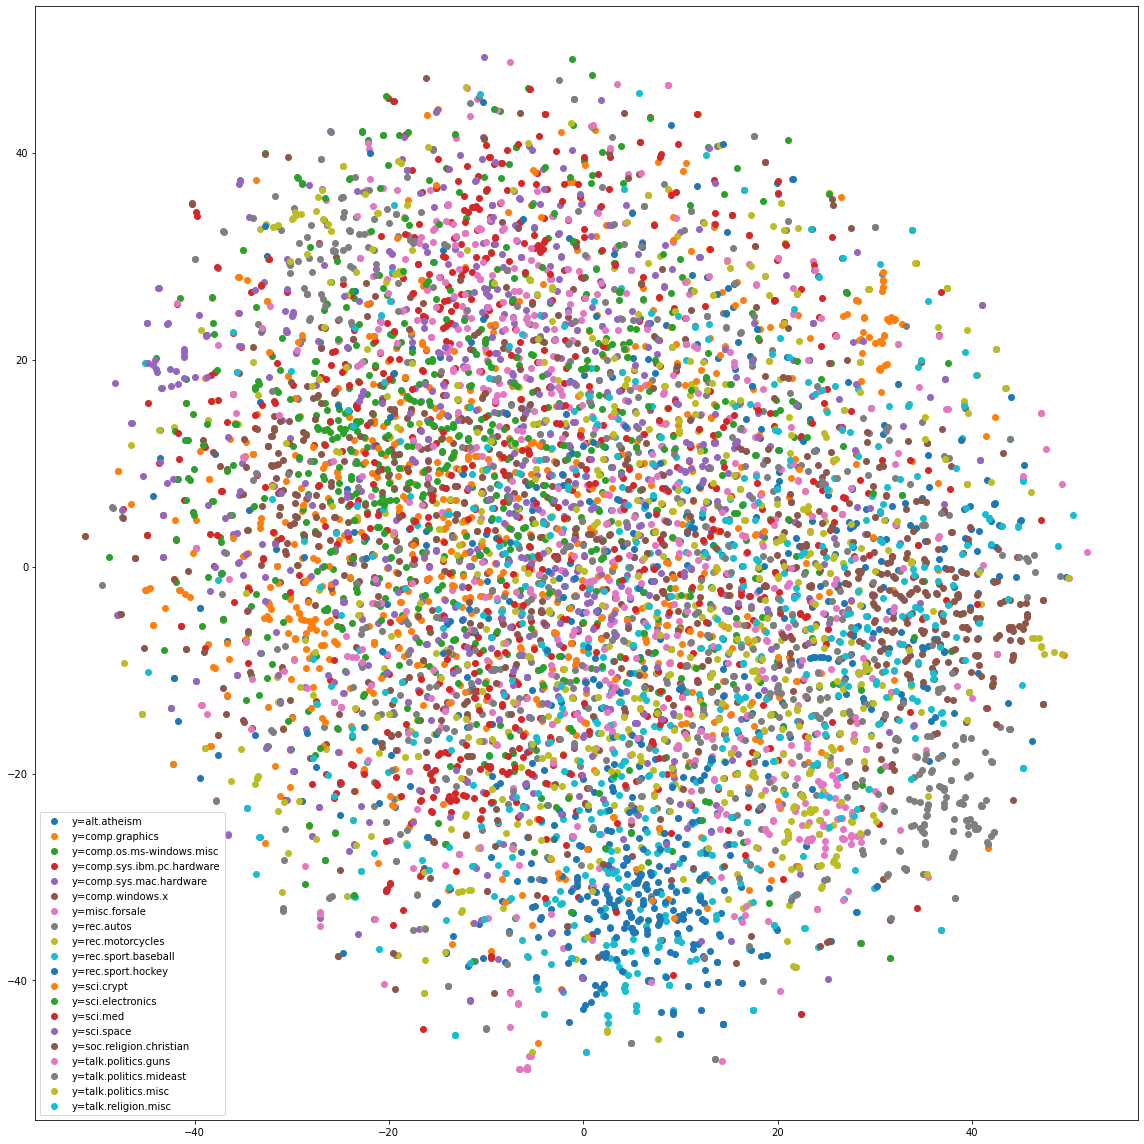

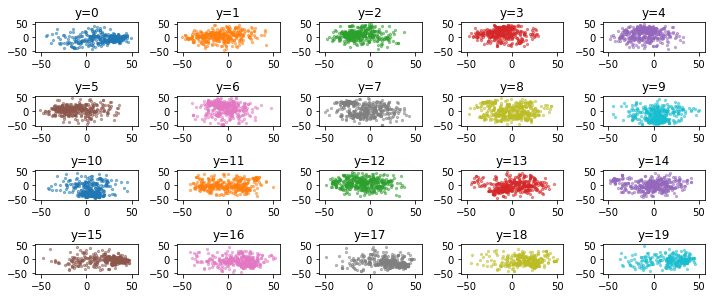

In [26]:
# Embedding visualization
# t-sne
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import numpy as np
vocab = json.load(open(DATA_PATH+'vocab.json','r'))
zs = []
xs = []
ys = []

for (x, y) in test_loader:
    if len(x) == BATCH_SIZE:
        q = model.encoder(x.cuda().double())
        z = q['z'].value.cpu().detach().numpy()
        zs.append(z.reshape(-1, LATENT_DIM))
        xs.append(x.numpy())
        ys.append(y.numpy())

zs = np.concatenate(zs, 0)
xs = np.concatenate(xs, 0)
ys = np.concatenate(ys, 0)
zs_mean = zs.mean(0)
zs_std = zs.std(0)

%matplotlib inline
zs2 = TSNE().fit_transform(zs)

fig = plt.figure(figsize=(10,10))
ax = plt.gca()

colors = []
for k in range(len(labels)):
    m = (ys==k)
    p = ax.scatter(zs2[m, 0], zs2[m, 1], label='y=%s'%labels[k])
    colors.append(p.get_facecolor())
ax.legend()
fig.tight_layout()
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
# save figure
plt.savefig(SAVE_PATH+'tsne.png')


# for each class independently
fig = plt.figure(figsize=(10,4.25))

for k in range(len(labels)):
    ax = plt.subplot(4,5,k+1)
    m = (ys == k)
    ax.scatter(zs2[m, 0], zs2[m, 1], alpha=0.5, s=5, c=colors[k])
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax.set_title('y=%d' % k)

fig.tight_layout()
plt.savefig(SAVE_PATH+'tsne_by_class.png')



#### z-histograms to see learned distributions
TODO



#### Correlation plot (z)

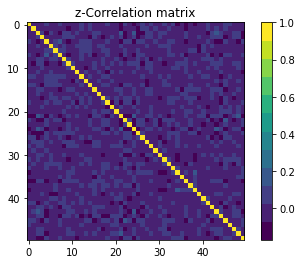

In [28]:
#correlation plot
from matplotlib import cm
cov_matrix = np.corrcoef(zs.T)
plt.imshow(cov_matrix, interpolation='None', cmap=cm.get_cmap('viridis',12))
plt.title('z-Correlation matrix')
plt.colorbar()
plt.savefig(SAVE_PATH+'z-correlations.png')



#### Top words

In [8]:
from evaluation.topics import print_top_words
from utils.file_handling import MultiOutput
# save output
f = open(SAVE_PATH+'topics.txt','w')
original = sys.stdout
sys.stdout = MultiOutput(sys.stdout, f)
# Top words in topics
# load the vocab
vocab = json.load(open(DATA_PATH+'vocab.json','r'))
idx2word = {i:vocab[i] for i in range(len(vocab))}
# get weights of the decoder
emb = model.decoder.main[0].weight.cpu().detach().numpy().T
print_top_words(emb, idx2word)
sys.stdout = original
f.close()


--------------- Topics ------------------
fbi batf proposal clinton waco enforcement device encrypted clipper assault
virtual mouse turbo screen manuals offers vision energy printer eat
scripture modes nsa greek conflict church nazi vga proof faith
gun eternal fire semi font fonts die convert sin guns
hitting fan guys ball yeah air absolute force water heat
homosexual jewish surrender sexual scripture drug gordon intelligence catholic jews
dealer prices letter pick price dealers room fun season age
slot supply mary power electronics joseph heat circuit max goals
shuttle effects children pressure risk gas blood impact distance bodies
wings cup islam round weight intelligence orbit vehicle playoff laser
function nature pass functions purpose actions machines wide mode consistent
ide scsi atheist patients atheists god christianity pain sex gods
armenia installed bus armenian boot lights switch installation air motherboard
punishment child woman fault morality ide controller sin penalty pi

#### NPMI

In [9]:
from evaluation.topics import npmi_coherence_score
import pickle
X_raw = json.load(open(DATA_PATH+'X_raw.json','r'))
decoder_weight = model.decoder.main[0].weight.detach().cpu()
top_words = 10
topics = [
    [idx2word[item.item()] for item in topic]
    for topic in decoder_weight.topk(10, dim=0)[1].t()
]
word_frequencies = pickle.load(open(DATA_PATH+'word_frequencies.pkl','rb'))
joint_word_frequencies = pickle.load(open(DATA_PATH+'jointword_frequencies.pkl','rb'))
npmi_per_topic = npmi_coherence_score(topics, word_frequencies, joint_word_frequencies)
print(npmi_per_topic)
print(sum(npmi_per_topic)/len(npmi_per_topic))
print('Max: %f'%max(npmi_per_topic))
print('Topic : %s'%(' '.join(topics[np.argmax(npmi_per_topic)])))
# save results
json.dump({'npmi_per_topic':npmi_per_topic, 'avg_npmi':sum(npmi_per_topic)/len(npmi_per_topic)},open(SAVE_PATH+'npmi.json','w'))



[0.26072835036724323, 0.19382156281284332, -0.07191147578898806, -0.03713563978969274, 0.10273880954894028, 0.11056959334766372, 0.11265556378534569, 0.09989881433592974, 0.2439640062068348, -0.05881541656181065, 0.26178970322835976, -0.16535942252727454, 0.07468181900123681, -0.0678549471507568, 0.1709725432030677, -0.1018408683339366, 0.24802055468774664, 0.15392420737213694, 0.27347333945993746, 0.34396817799429136]
0.10741446375995589
Max: 0.343968
Topic : armenian kings club genocide station armenia armenians alive soviet women


#### LDA for comparison

In [18]:
import gensim
# training classic LDA just for comparison
corpus = gensim.matutils.Dense2Corpus(train_data, documents_columns=False)
lda = gensim.models.LdaMulticore(corpus=corpus,
                                 id2word=idx2word,
                                 num_topics=50,
                                 random_state=100,
                                 passes=10)

In [19]:
coherence_model = gensim.models.CoherenceModel(model=lda,
                                               texts=X_raw,
                                               dictionary=gensim.corpora.dictionary.Dictionary.from_corpus(corpus, idx2word),
                                               coherence='c_npmi')
topic_coherences = coherence_model.get_coherence_per_topic()
print(topic_coherences)
print(sum(topic_coherences)/len(topic_coherences))

[0.05049653446593177, 0.018853839167305892, 0.13889612641516624, 0.022945950029298473, -0.0006003120676231906, 0.1428051110383231, 0.11315420450649968, 0.0603837412866034, -0.07631427244884832, 0.13477647813050067, -0.12113910056456596, 0.03452064847060468, -0.012526820374331515, 0.13433586922156424, 0.08481460233152115, -0.0046095948153488525, 0.14795521458271274, 0.0643200487789307, 0.09741848749268073, -0.028582443389426147, 0.013560249247074262, -0.029854817229828124, 0.17069680278113172, 0.041594051846695755, 0.023262740152461197, -0.015284992085027458, 0.02957366350989352, -0.012382081119426134, -0.0809209396639903, -0.05902062671151506, -0.03754023400933772, 0.054073430455275046, 0.044970844029611955, 0.004594873432606471, 0.11843654659168892, 0.05827839243050851, -0.12443164045021132, 0.018179347383259856, -0.06328050309834121, 0.003220650621897766, 0.018718541240538306, -0.009209533430282583, 0.09513379877887652, 0.16329721392069838, 0.024118672311393214, -0.06975283708929722,

In [21]:
# with my implementation
topics = lda.show_topics(num_topics=50, num_words=10, formatted=False)
topics = [[t[0] for t in topic[1]] for topic in topics]
npmi_per_topic = npmi_coherence_score(topics, word_frequencies, joint_word_frequencies)
print(npmi_per_topic)
print(sum(npmi_per_topic)/len(npmi_per_topic))
for topic in topics:
    print(topic)



[0.16410033369830448, 0.3111506547532112, 0.3114129065896065, 0.2532044613857142, 0.18540062448569977, 0.3571823886854365, 0.3122368409907439, 0.2697089955510378, 0.14553792552260353, 0.416451331905533, 0.19892567161221894, 0.27745537742764353, 0.20559272753652633, 0.340324700723863, 0.4240882933319373, 0.22213953829759964, 0.4676971884705831, 0.13982192371931396, 0.3665607427566965, 0.18697436442110582, 0.32289840459720787, 0.24979912838610635, 0.3740518835592937, 0.21790243274365118, 0.21180207632988513, 0.20816621490125248, 0.18736735069409186, 0.17593497473809364, 0.17990350537115046, 0.18011868130999345, 0.23890330528870785, 0.237629458728827, 0.16311259013485555, 0.16870227815922761, 0.3344769660198739, 0.23457751758471912, 0.15180438273571348, 0.17458782640347076, 0.1379065730339304, 0.28150057621561597, 0.1909182071256871, 0.28186802094285945, 0.26290095125736423, 0.4331352499031874, 0.15669152368152559, 0.14540524721734785, 0.18392229075549102, 0.14442045864007083, 0.121592459

#### Mutual informtaion - I(x,zd)

In [11]:
# mutual information
from evaluation.NPEET.npeet import entropy_estimators as ee
import warnings
warnings.filterwarnings("ignore")
mi = ee.mi(xs, zs)
micd = ee.micd(zs, xs)
print(mi)
print(micd)
# THIS IS EXTREMELY SLOW - takes almost as much as training the model

0.38429782557580333
0.22591102625038673


In [ ]:
# using sklearn
from sklearn.feature_selection import mutual_info_regression
# each component of z is treated as a continuous target variable (y)
# x are features, which are discrete
mis = []
for i in range(zs.shape[-1]):
    mi = mutual_info_regression(X=xs, y=zs[...,i], discrete_features=True).mean()
    print(mi)
    mis.append(mi)
print(mis)
print(np.mean(mis))
# also very slow - ~5min per dimension

0.0006332697304276079
0.0012150221756404595
0.0006841355330150861
0.0006358042489734839
0.0008735679972716653
0.0006930410157645273
0.0005927225468085475
0.0008304877877976529


#### Mutual information - I(yk,zd)